In [28]:
import pandas as pd
cgvs = pd.read_csv("./final project/mega.csv")
cgvs

,Unnamed: 0,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm,text
0,0,203315,콘텐트리중앙,36420,Y,사업보고서 (2021.12),20220323001342,콘텐트리중앙,20220323,NaN,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 주식회사 제이콘텐트...
1,1,203315,콘텐트리중앙,36420,Y,사업보고서 (2020.12),20210317000814,콘텐트리중앙,20210317,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 주식회사 제이콘텐트...
2,2,203315,콘텐트리중앙,36420,Y,사업보고서 (2019.12),20200330002955,콘텐트리중앙,20200330,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 주식회사 제이콘텐트...
3,3,203315,콘텐트리중앙,36420,Y,[기재정정]사업보고서 (2018.12),20190716000323,콘텐트리중앙,20190717,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 주식회사 제이콘텐트...
4,4,203315,콘텐트리중앙,36420,Y,사업보고서 (2017.12),20180402004265,콘텐트리중앙,20180402,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 주식회사 제이콘텐트...
5,5,203315,콘텐트리중앙,36420,Y,[기재정정]사업보고서 (2016.12),20170515004185,콘텐트리중앙,20170515,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 주식회사 제이콘텐트...


In [29]:
from collections import Counter #데이터의 개수를 정리할 수 있는 모듈
from konlpy.tag import Kkma #형태소 분석기 호출
from konlpy.utils import pprint #유니코드 문자 출력
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용


kkma = Kkma()

nouns_af_covid=[] #코로나 후 nouns_list생성


for item in cgvs['text'][0:3]: #코로나후인2020-2022년도

    sentence_list = kkma.sentences(item)

   
    for sentence in sentence_list:

        nouns = kkma.pos(sentence) #sentence의 형태소 분석

        for pos in nouns:

            if pos[1] == 'NNG' or pos[1] == 'NNP': #일반 명사와 고유 명사일 경우

                nouns_af_covid+=[pos[0]] #nouns_af_covid에 추가


count_af_covid = Counter(nouns_af_covid) #nouns_af_covid 내 항목명과 항목별 개수

In [30]:

ignore = ['영업','사이트','당사','사항','전년','자산','증','임','회사','부','뜨','박스','현금','비','수','의','말','여', 1,'가'
         ,'흐름','관련','사업','오피스','여','파생','본','개','을','당','자료','환경','해당','환','콘','텐트','경우','밖','원','연'
        '결','투','액','전','미','표','감','라','총','유','시','마','바','별','향','외','가','약','기','점','폭','각','인','보고',
        '여','포','디','습','고','일','공','폼','간','기준','부문','전기','작성','주'] #제거할 불필요한 단어 및 표현 리스트

 

for word in ignore:

    if word in count_af_covid:

        del count_af_covid [word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

In [31]:
from collections import Counter #데이터의 개수를 정리할 수 있는 모듈
from konlpy.tag import Kkma#형태소 분석기 호출
from konlpy.utils import pprint #유니코드 문자 출력
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용


kkma = Kkma()

nouns_bf_covid=[] #코로나 전 nouns_list생성


for item in cgvs['text'][3:]: #코로나전인2017-2019년도

    sentence_list = kkma.sentences(item)

   
    for sentence in sentence_list:

        nouns = kkma.pos(sentence) #sentence의 형태소 분석

        for pos in nouns:

            if pos[1] == 'NNG' or pos[1] == 'NNP': #일반 명사와 고유 명사일 경우

                nouns_bf_covid+=[pos[0]] #nouns_bf_covid에 추가


count_bf_covid = Counter(nouns_bf_covid) #nouns_bf_covid 내 항목명과 항목별 개수

In [32]:
ignore = ['영업','사이트','당사','사항','전년','자산','증','임','회사','부','뜨','박스','현금','비','수','의','말','여', 1,'가'
         ,'흐름','관련','사업','오피스','여','파생','본','개','을','당','자료','환경','해당','환','콘','텐트','경우','밖','원','연'
        '결','투','액','전','미','표','감','라','총','유','시','마','바','별','향','외','가','약','기','점','폭','각','인','보고',
        '여','포','디','습','고','일','공','폼','간','기준','부문','전기','작성','주'] #제거할 불필요한 단어 및 표현 리스트
 

for word in ignore:

    if word in count_bf_covid:

        del count_bf_covid [word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

In [33]:
from operator import itemgetter

sorted_count_af_covid = sorted(count_af_covid.items(), key=itemgetter(1), reverse=True)
sorted_count_af_covid

[('증가', 148),
 ('대비', 110),
 ('극장', 69),
 ('위험', 61),
 ('손익', 59),
 ('영향', 57),
 ('다음', 57),
 ('자금', 52),
 ('매출', 50),
 ('예측', 48),
 ('기업', 48),
 ('회계', 48),
 ('금액', 46),
 ('코로나', 45),
 ('손상', 45),
 ('감소', 44),
 ('요인', 43),
 ('사채', 43),
 ('정보', 42),
 ('산업', 42),
 ('재무', 41),
 ('경영', 39),
 ('스튜디오', 39),
 ('투자', 38),
 ('당기', 38),
 ('보고서', 37),
 ('성장', 37),
 ('제작', 37),
 ('기말', 37),
 ('평가', 36),
 ('교환', 36),
 ('발생', 35),
 ('실적', 35),
 ('중앙', 35),
 ('환율', 34),
 ('재무제표', 33),
 ('발행', 33),
 ('기록', 32),
 ('현재', 32),
 ('부채', 32),
 ('중단', 31),
 ('변동', 31),
 ('약정', 31),
 ('국제', 30),
 ('동', 30),
 ('방송', 30),
 ('보유', 30),
 ('유동성', 30),
 ('확보', 29),
 ('한국', 28),
 ('종속', 27),
 ('활동', 27),
 ('외부', 27),
 ('매출액', 27),
 ('결과', 26),
 ('표시', 26),
 ('제이', 25),
 ('채택', 24),
 ('유동', 24),
 ('체결', 24),
 ('기간', 24),
 ('예상', 22),
 ('단위', 22),
 ('회수', 22),
 ('내역', 22),
 ('가정', 21),
 ('중요', 21),
 ('메가', 21),
 ('가능', 21),
 ('유통', 20),
 ('영화', 20),
 ('인식', 20),
 ('계산서', 20),
 ('반영', 19),
 ('경제', 19),
 ('가치', 19),
 (

In [34]:
from operator import itemgetter

sorted_count_bf_covid = sorted(count_bf_covid.items(), key=itemgetter(1), reverse=True)
sorted_count_bf_covid

[('증가', 308),
 ('대비', 195),
 ('예측', 120),
 ('위험', 117),
 ('자금', 111),
 ('요인', 108),
 ('정보', 106),
 ('감소', 106),
 ('다음', 99),
 ('극장', 96),
 ('투자', 92),
 ('영향', 90),
 ('보고서', 89),
 ('기업', 87),
 ('동', 87),
 ('금액', 84),
 ('재무', 82),
 ('성장', 82),
 ('경영', 78),
 ('매출', 78),
 ('방송', 78),
 ('기말', 78),
 ('손익', 76),
 ('실적', 75),
 ('사채', 75),
 ('교환', 74),
 ('회계', 72),
 ('손상', 69),
 ('발생', 66),
 ('부채', 66),
 ('당기', 66),
 ('매출액', 63),
 ('약정', 63),
 ('유동', 61),
 ('코로나', 60),
 ('발행', 60),
 ('보유', 59),
 ('산업', 57),
 ('변동', 57),
 ('유동성', 57),
 ('차입금', 57),
 ('확보', 56),
 ('중앙', 55),
 ('예상', 54),
 ('결과', 51),
 ('제작', 51),
 ('상환', 51),
 ('재무제표', 48),
 ('가정', 48),
 ('기록', 48),
 ('현재', 48),
 ('평가', 48),
 ('환율', 48),
 ('이익', 46),
 ('한국', 45),
 ('국제', 45),
 ('활동', 45),
 ('시점', 45),
 ('기재', 45),
 ('중요', 45),
 ('외부', 45),
 ('단위', 45),
 ('체결', 45),
 ('메가', 44),
 ('스튜디오', 42),
 ('반영', 40),
 ('영화', 40),
 ('중단', 40),
 ('제이', 39),
 ('종속', 39),
 ('포함', 39),
 ('상태', 39),
 ('공개', 39),
 ('드라마', 38),
 ('채택', 36),
 ('미래', 

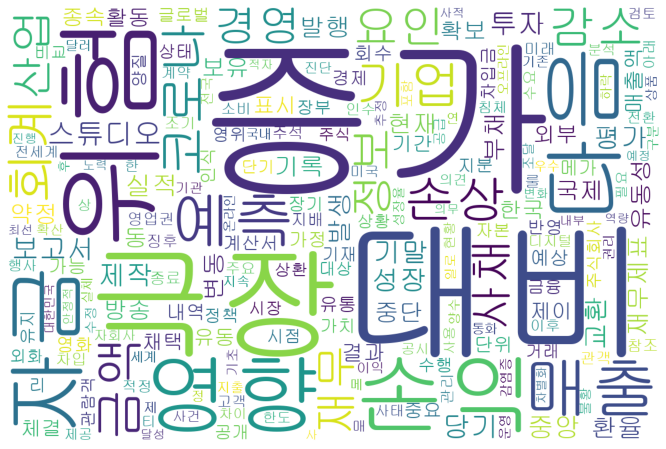

In [35]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path ="C:/Windows/Fonts/gulim.ttc"

wc = WordCloud(width = 1200, height = 800, background_color="white", font_path=font_path)
plt.figure(figsize=(12, 8))
plt.imshow(wc.generate_from_frequencies(count_af_covid))
plt.axis("off")
plt.show()

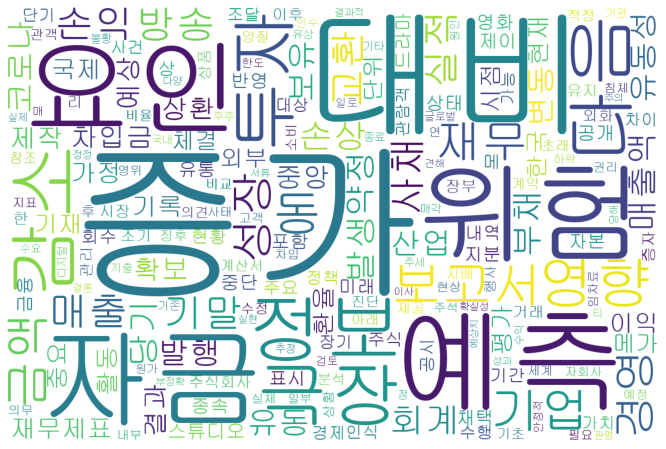

In [36]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path ="C:/Windows/Fonts/gulim.ttc"

wc = WordCloud(width = 1200, height = 800, background_color="white", font_path=font_path)
plt.figure(figsize=(12, 8))
plt.imshow(wc.generate_from_frequencies(count_bf_covid))
plt.axis("off")
plt.show()

In [37]:
x = count_af_covid
 
for key, value in list(x.items()):
    if int(value) <= 43:    # 값이 43이하면
        del x[key]     # 키-값 쌍 삭제
 
print(x)

Counter({'증가': 148, '대비': 110, '극장': 69, '위험': 61, '손익': 59, '영향': 57, '다음': 57, '자금': 52, '매출': 50, '예측': 48, '기업': 48, '회계': 48, '금액': 46, '코로나': 45, '손상': 45, '감소': 44})


In [38]:
x1 = count_bf_covid
 
for key, value in list(x1.items()):
    if int(value) <= 85:    # 값이 85이하면
        del x1[key]     # 키-값 쌍 삭제
 
print(x1)

Counter({'증가': 308, '대비': 195, '예측': 120, '위험': 117, '자금': 111, '요인': 108, '정보': 106, '감소': 106, '다음': 99, '극장': 96, '투자': 92, '영향': 90, '보고서': 89, '기업': 87, '동': 87})


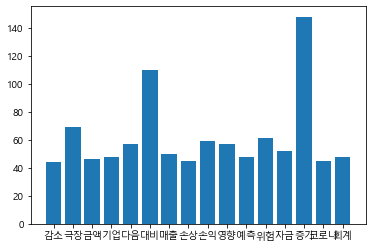

In [39]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

import matplotlib.pylab as plt

my_dict = x

myList = my_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 


plt.bar(x, y)
plt.show()

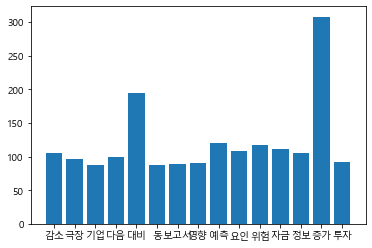

In [40]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

import matplotlib.pylab as plt

my_dict = x1

myList = my_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 


plt.bar(x, y)
plt.show()